<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Stack_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-datareader

In [1]:
import os
import pandas_datareader as pdr

In [2]:
df=pdr.get_data_tiingo('AAPL',api_key='10d558dbb1b846c4d11ffa814985dfd4296cdd1f')

<ipython-input-2-c2e547b40ec7>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key='10d558dbb1b846c4d11ffa814985dfd4296cdd1f')


In [3]:
df.shape

(1256, 12)

In [4]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-08-02 00:00:00+00:00  207.39  208.38  200.35  200.58  62404012   
       2018-08-03 00:00:00+00:00  207.99  208.74  205.48  207.03  33447396   
       2018-08-06 00:00:00+00:00  209.07  209.25  207.07  208.00  25425387   
       2018-08-07 00:00:00+00:00  207.11  209.50  206.76  209.32  25587387   
       2018-08-08 00:00:00+00:00  207.25  207.81  204.52  206.05  22525487   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-08-02 00:00:00+00:00  49.545200  49.781710  47.863353  47.918300   
       2018-08-03 00:00:00+00:00  49.688539  49.867713  49.088903  49.459196   
       2018-08-06 00:00:00+00:00  49.946550  49.989551  49.468752  49.690928   
       2018-08-07 00:00:00+00:00  49.478308  50.049276  49.394694  50.006274   
       2018-08-08 00:00:00+00:00  49.511754  49.645537  48.859561  49.225076   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-08-02 00:00:00+00:00  249616048      0.0          1.0  
       2018-08-03 00:00:00+00:00  133789584      0.0          1.0  
       2018-08-06 00:00:00+00:00  101701548      0.0          1.0  
       2018-08-07 00:00:00+00:00  102349548      0.0          1.0  
       2018-08-08 00:00:00+00:00   90101948      0.0          1.0

In [5]:
new_df=df.reset_index()['close']

In [6]:
new_df.shape

(1256,)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

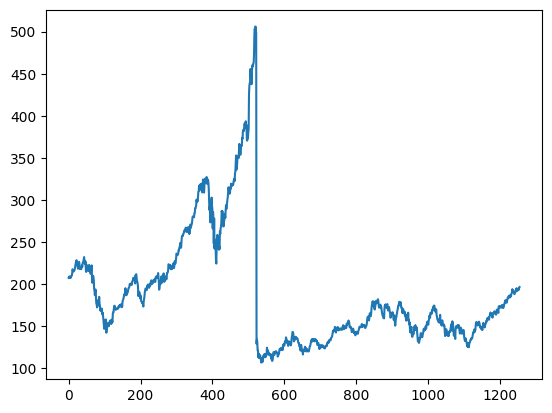

In [8]:
plt.plot(new_df)

In [9]:
new_df

0       207.39
1       207.99
2       209.07
3       207.11
4       207.25
         ...  
1251    193.62
1252    194.50
1253    193.22
1254    195.83
1255    196.45
Name: close, Length: 1256, dtype: float64

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
new_df=scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [11]:
new_df.shape

(1256, 1)

In [12]:
new_df

array([[0.25184721],
       [0.25335003],
       [0.2560551 ],
       ...,
       [0.21635567],
       [0.22289292],
       [0.22444584]])

In [13]:
 ##spltting dataset into train and test split
 train_size=int(len(new_df)*0.65)
 test_size=len(new_df)-train_size

In [14]:
train_size,test_size

(816, 440)

In [15]:
train_data,test_data=new_df[0:train_size,:],new_df[train_size:len(new_df),:1]

In [16]:
train_data.shape,test_data.shape

((816, 1), (440, 1))

In [17]:
##create dataset
def create_dataset(dataset, timestep=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-timestep-1):
    a=dataset[i:(i+timestep),0]
    dataX.append(a)
    dataY.append(dataset[i+timestep,0])
  return np.array(dataX),np.array(dataY)

In [18]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [19]:
print(X_train)

[[0.25184721 0.25335003 0.2560551  ... 0.12520977 0.10993112 0.10016281]
 [0.25335003 0.2560551  0.2511459  ... 0.10993112 0.10016281 0.12606137]
 [0.2560551  0.2511459  0.25149656 ... 0.10016281 0.12606137 0.12350657]
 ...
 [0.04563557 0.04182843 0.04771446 ... 0.10499687 0.10624922 0.10680025]
 [0.04182843 0.04771446 0.04773951 ... 0.10624922 0.10680025 0.10482154]
 [0.04771446 0.04773951 0.04984346 ... 0.10680025 0.10482154 0.10469631]]


In [20]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((715, 100), (339, 100), (715,), (339,))

In [21]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [23]:
X_train.shape

(715, 100, 1)

In [24]:
##importing the required library
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,LSTM
from tensorflow.keras.models import Sequential

In [26]:
##creating the stacked LSTM model
model=Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

##compile the model
model.compile(loss="mse",optimizer='adam')

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=64)

Epoch 1/50
12/12 [==============================] - 12s 427ms/step - loss: 0.0273 - val_loss: 5.9913e-04
Epoch 2/50
12/12 [==============================] - 3s 204ms/step - loss: 0.0114 - val_loss: 4.4723e-04
Epoch 3/50
12/12 [==============================] - 2s 200ms/step - loss: 0.0102 - val_loss: 6.8314e-04
Epoch 4/50
12/12 [==============================] - 2s 200ms/step - loss: 0.0083 - val_loss: 4.0863e-04
Epoch 5/50
12/12 [==============================] - 3s 232ms/step - loss: 0.0072 - val_loss: 4.1436e-04
Epoch 6/50
12/12 [==============================] - 4s 305ms/step - loss: 0.0089 - val_loss: 6.9883e-04
Epoch 7/50
12/12 [==============================] - 2s 207ms/step - loss: 0.0074 - val_loss: 0.0012
Epoch 8/50
12/12 [==============================] - 2s 200ms/step - loss: 0.0064 - val_loss: 6.1443e-04
Epoch 9/50
12/12 [==============================] - 2s 203ms/step - loss: 0.0054 - val_loss: 2.9999e-04
Epoch 10/50
12/12 [==============================] - 3s 212ms/step 

In [29]:
##predicting the model
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 61ms/step


In [30]:
 ##transformback to original form
 train_predict=scaler.inverse_transform(train_predict)
 test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

218.85036774924404

In [32]:
math.sqrt(mean_squared_error(y_test,test_predict))

157.4592129744617

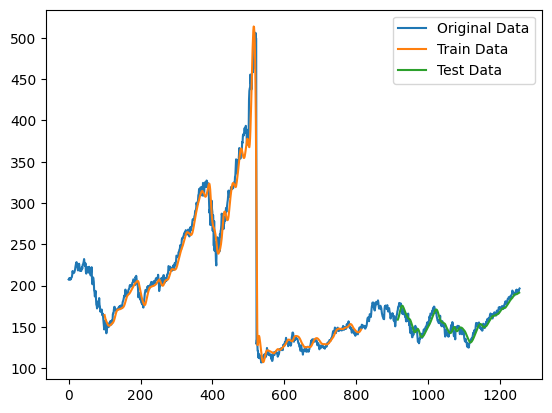

In [35]:
## Plotting
# shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(new_df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test predictions for plotting
testPredictionPlot=np.empty_like(new_df)
testPredictionPlot[:,:]=np.nan
testPredictionPlot[len(train_predict)+(look_back*2)+1:len(new_df)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(new_df),label="Original Data")
plt.plot(trainPredictPlot,label="Train Data")
plt.plot(testPredictionPlot,label="Test Data")
plt.legend()
plt.show()

In [36]:
len(test_data)

440

In [38]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.1675892298058

In [53]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202
 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374
 0.20480902 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428
 0.21763306 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755
 0.21956168 0.21635567 0.22289292 0.22444584 0.21340477 0.21409194
 0.21450111 0.2146322  0.21452335 0.21422368 0.21378054 0.21323405
 0.21261646 0.21195205 0.21125904 0.21055061 0.2098362  0.20912227
 0.2084135  0.20771284 0.2070221  0.20634237 0.20567

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [58]:
len(new_df)-1156

100

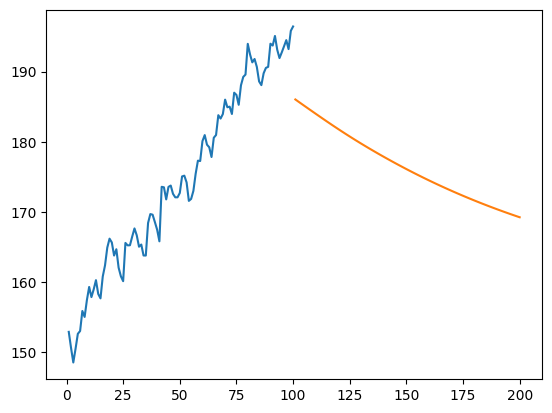

In [59]:
plt.plot(day_new,scaler.inverse_transform(new_df[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

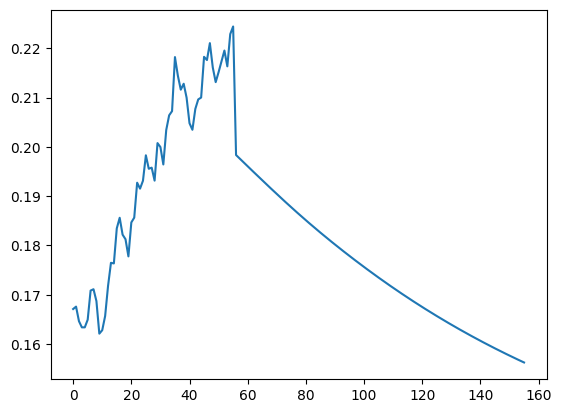

In [60]:
df3=new_df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

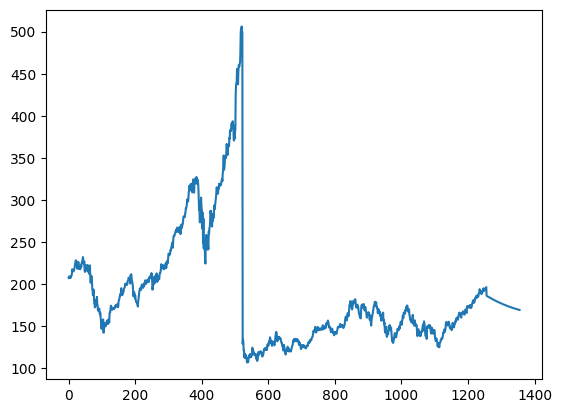

In [61]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)